# Fraud detection

In [5]:
#load packages
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 
#misc libraries
import random
import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier
import pandas as pd
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection as ms
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection
from xverse.ensemble import VotingSelector
from xverse.feature_subset import SplitXY
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
%config InlineBackend.figure_format='retina'

In [6]:
df = pd.read_csv('creditcard.csv')
df.info()
df.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [12]:
df.shape

(284807, 31)

In [11]:
len(set(df.Time.to_numpy()))

124592

In [8]:
df.sort_values(by='Time').head(50)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.drop(['Time'], axis=1, inplace=True)

In [7]:
df.shape

(284807, 30)

## Visualization

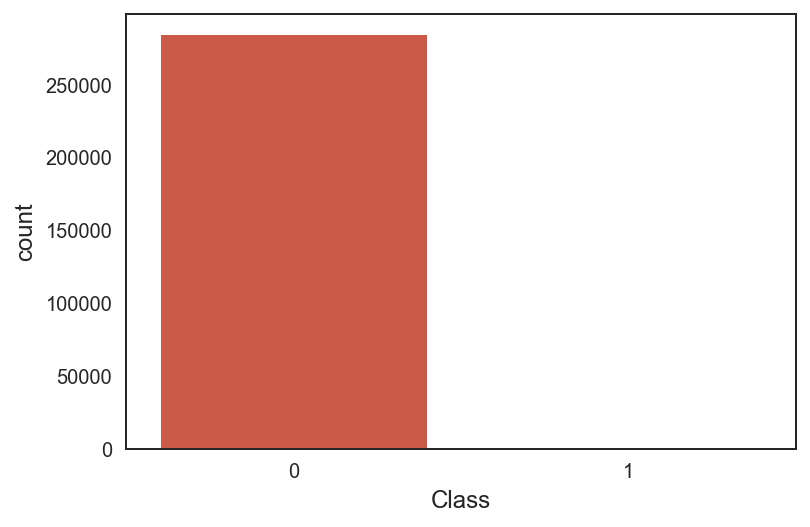

In [8]:
sns.countplot(x='Class', data=df);

In [9]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : ",classes[0]," ",normal_share,"%")
print("    Fraudulent : ",classes[1]," ",fraud_share,"%")


Non-Fraudulent :  284315   99.83 %
    Fraudulent :  492   0.17 %


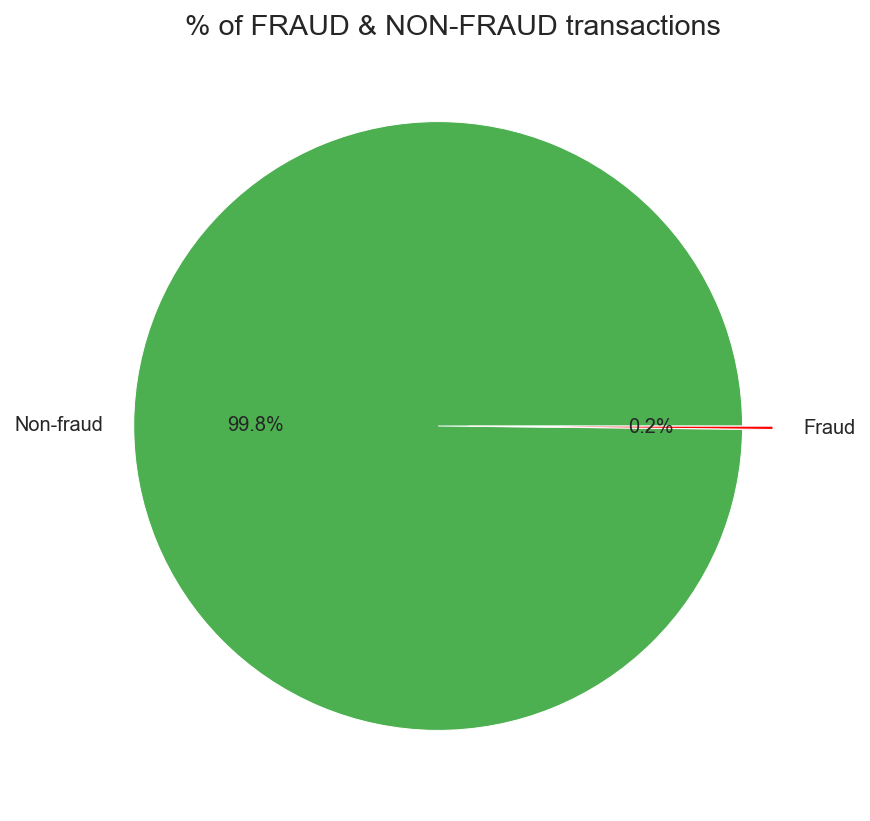

In [10]:
pie, ax = plt.subplots(figsize=[7,7])
labels = ['Non-fraud', 'Fraud']
colors = ['Salmon', 'Chartreuse']
plt.pie(x = classes, autopct='%.1f%%', explode=[0.05]*2,colors=['#4CAF50','r'] ,labels=labels)
plt.title('% of FRAUD & NON-FRAUD transactions')
plt.show()

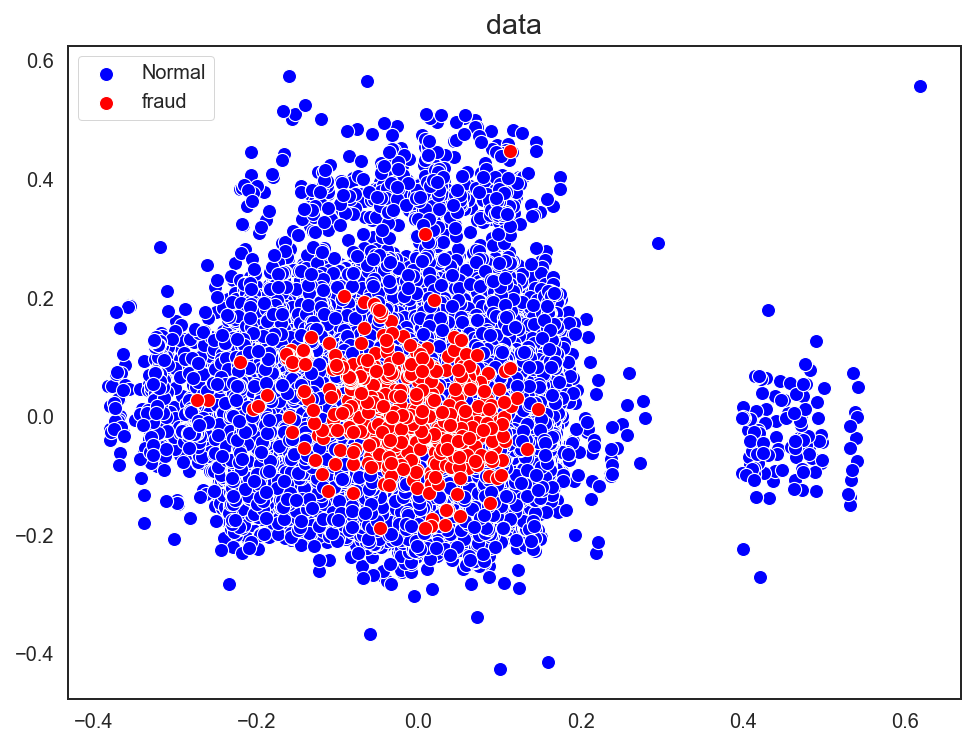

Wall time: 6.21 s


In [11]:
%%time
y1=df['Class']
x1=df.drop('Class',axis=1)

scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1)

pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

In [12]:
df.shape

(284807, 30)

## **Feature Engineering**

**plot a correlation table of features**

In [13]:
#Add a lable to the first column of the table
Target=pd.DataFrame(df['Class'])
df.drop(['Class'],axis=1,inplace=True)
df = pd.concat([Target, df], axis=1)

In [14]:
df.shape

(284807, 30)

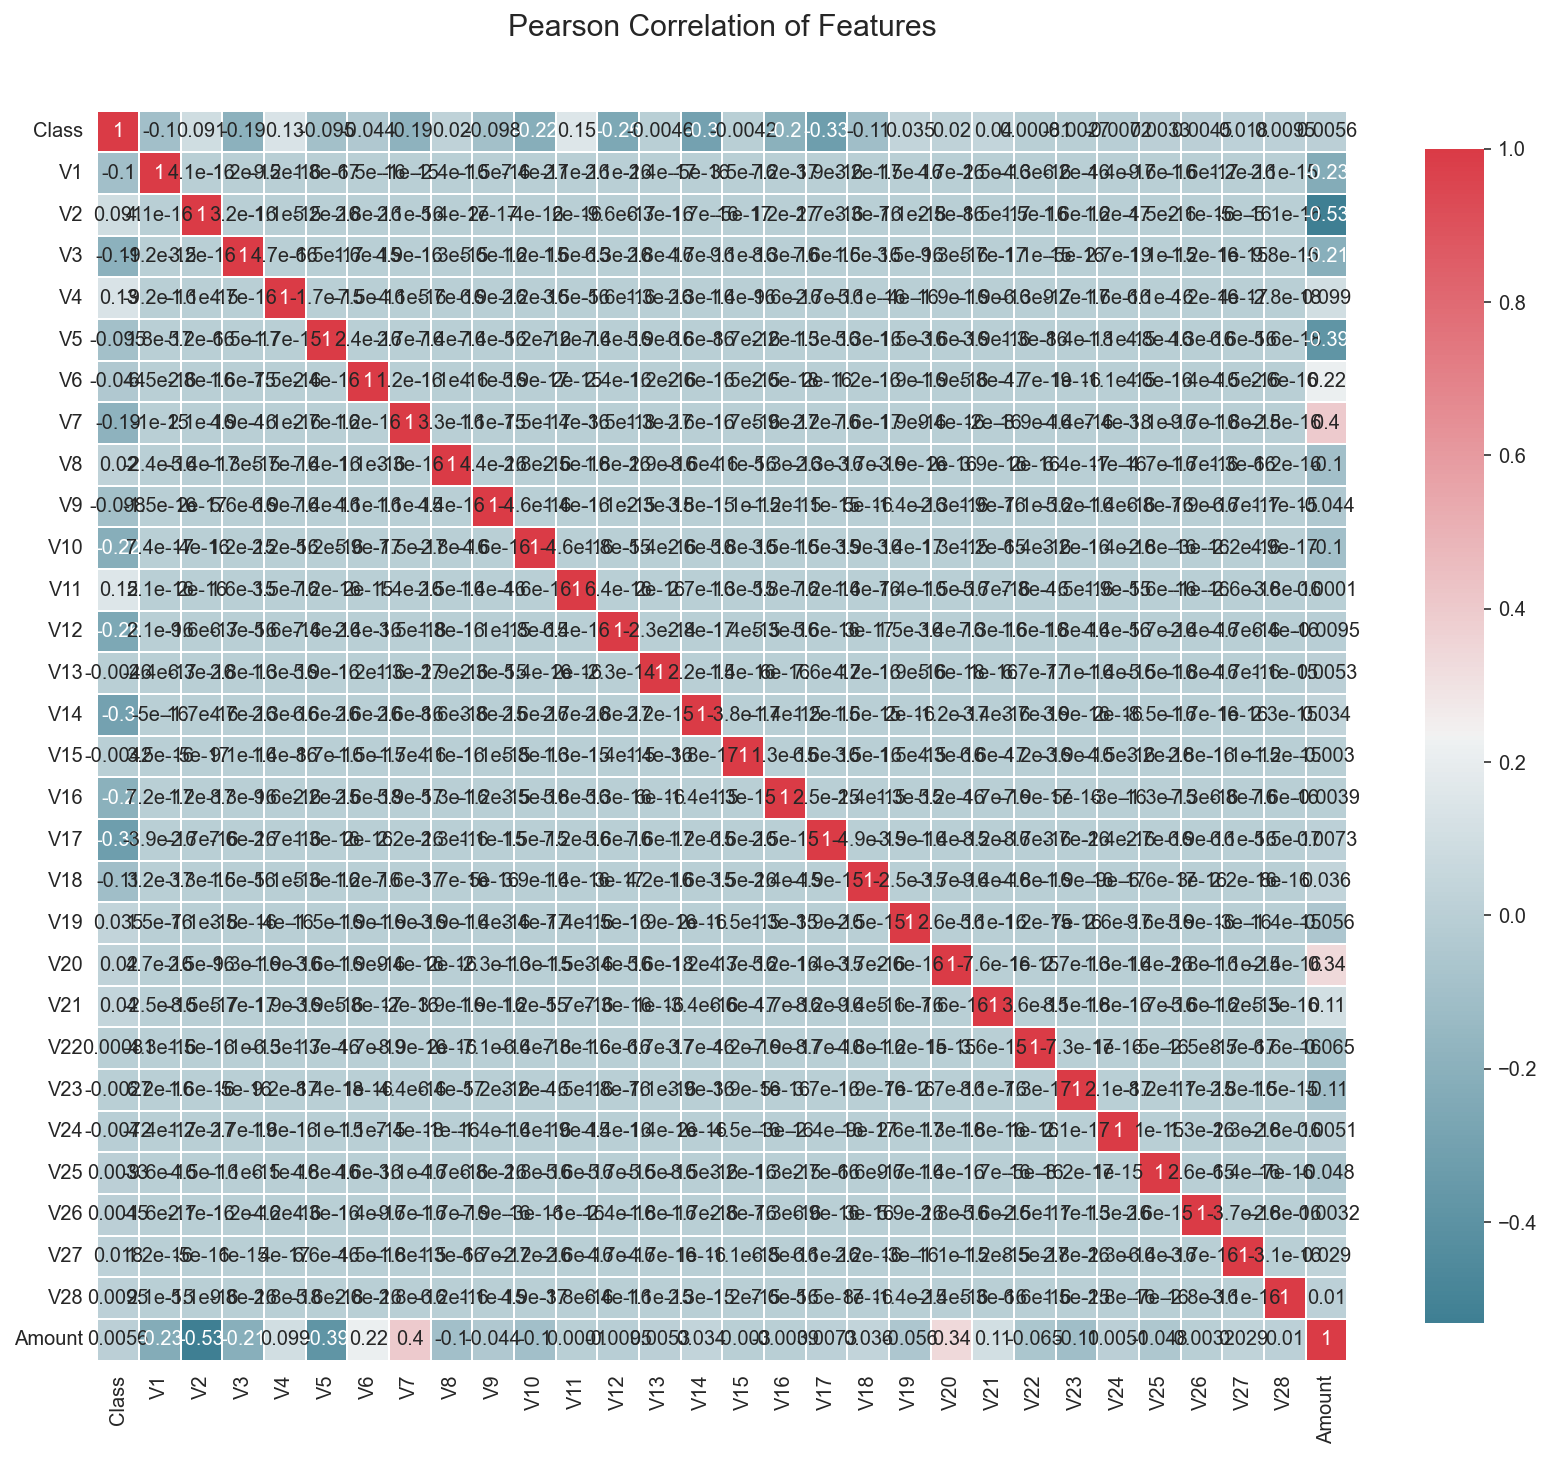

In [15]:
def correlation_heatmap(df, type):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(method=type), #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df, 'pearson')

**feature selection**

In [16]:
#The results may be different for each run
clf = SplitXY(['Class']);
X, y = clf.fit_transform(df);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0);
print(X_train.shape,y_train.shape)
clf = VotingSelector();
clf.fit(X_train, y_train);
clf.feature_importances_

(199364, 29) (199364,)


,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,V4,2.438455,0.025610,0.565090,0.037905,56.178263,0.019685
1,V14,2.263420,0.134488,-0.665832,0.127636,28.584470,-0.053603
2,V12,2.044015,0.135447,0.000000,0.088202,28.108355,-0.030940
3,V3,1.786005,0.016601,0.000000,0.035248,12.132805,0.000000
4,V11,1.774223,0.070394,0.000000,0.067624,59.350404,0.016049
5,V10,1.623403,0.056395,-0.580740,0.072123,9.228625,-0.033492
6,V16,1.226892,0.043293,-0.204636,0.084543,19.296888,-0.028160
7,V2,1.222110,0.012216,0.000000,0.017514,0.886841,-0.009113
8,V17,1.077666,0.203802,0.000000,0.135381,17.977876,-0.045139
9,V9,1.036067,0.027676,-0.148327,0.030100,5.916116,-0.021741


In [22]:
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
0,V4,1,1,1,1,1,1,6
1,V14,1,1,1,1,1,1,6
5,V10,1,1,1,1,1,1,6
6,V16,1,1,1,1,1,1,6
9,V9,1,1,1,1,1,1,6
2,V12,1,1,0,1,1,1,5
4,V11,1,1,0,1,1,1,5
8,V17,1,1,0,1,1,1,5
10,V7,1,1,0,1,1,1,5
11,V21,1,1,1,1,0,1,5


In [23]:
vars_selected_unbalanced = clf.feature_votes_[clf.feature_votes_['Votes'] >= 2]['Variable_Name']
print(vars_selected_unbalanced)

0      V4
1     V14
5     V10
6     V16
9      V9
2     V12
4     V11
8     V17
10     V7
11    V21
15    V18
18     V8
12     V1
3      V3
13     V6
7      V2
16    V27
17     V5
26    V26
Name: Variable_Name, dtype: object


In [24]:
df.drop(['Class'],axis=1,inplace=True)

In [25]:
selected_vars = list((set(vars_selected_unbalanced)))

In [26]:
df1=df[selected_vars]

In [27]:
df1.head()

,V14,V11,V3,V27,V10,V21,V8,V2,V18,V12,V17,V16,V6,V4,V7,V1,V5,V26,V9
0,-0.311169,-0.551600,2.536347,0.133558,0.090794,-0.018307,0.098698,-0.072781,0.025791,-0.617801,0.207971,-0.470401,0.462388,1.378155,0.239599,-1.359807,-0.338321,-0.189115,0.363787
1,-0.143772,1.612727,0.166480,-0.008983,-0.166974,-0.225775,0.085102,0.266151,-0.183361,1.065235,-0.114805,0.463917,-0.082361,0.448154,-0.078803,1.191857,0.060018,0.125895,-0.255425
2,-0.165946,0.624501,1.773209,-0.055353,0.207643,0.247998,0.247676,-1.340163,-0.121359,0.066084,1.109969,-2.890083,1.800499,0.379780,0.791461,-1.358354,-0.503198,-0.139097,-1.514654
3,-0.287924,-0.226487,1.792993,0.062723,-0.054952,-0.108300,0.377436,-0.185226,1.965775,0.178228,-0.684093,-1.059647,1.247203,-0.863291,0.237609,-0.966272,-0.010309,-0.221929,-1.387024
4,-1.119670,-0.822843,1.548718,0.219422,0.753074,-0.009431,-0.270533,0.877737,-0.038195,0.538196,-0.237033,-0.451449,0.095921,0.403034,0.592941,-1.158233,-0.407193,0.502292,0.817739


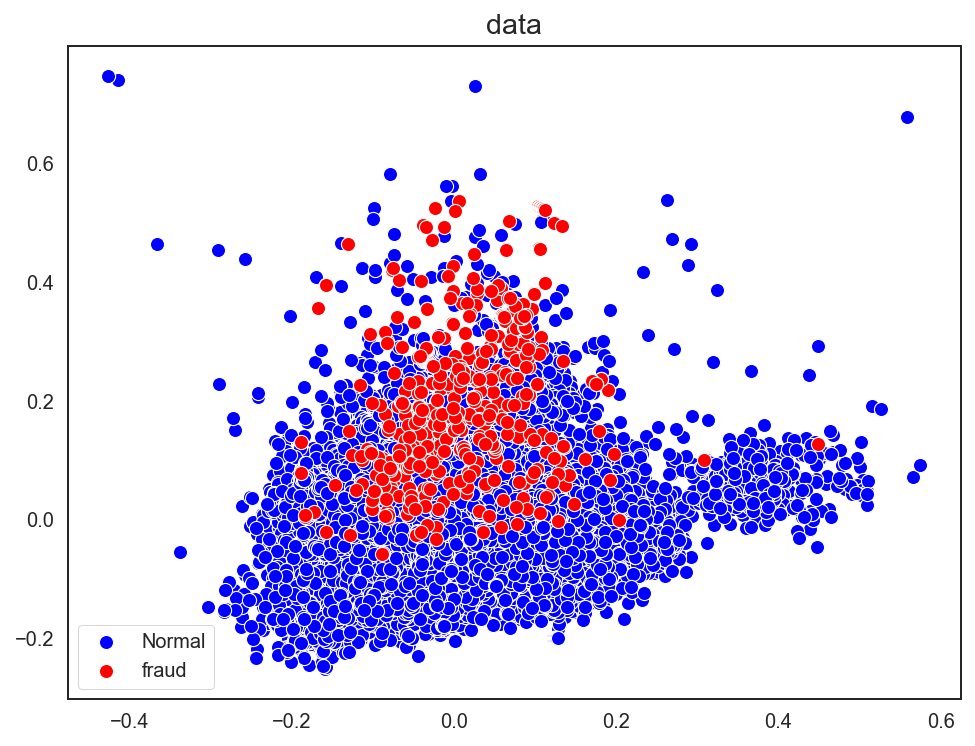

In [28]:
x1=df1
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

Final Dataframe

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V14     284807 non-null  float64
 1   V11     284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V27     284807 non-null  float64
 4   V10     284807 non-null  float64
 5   V21     284807 non-null  float64
 6   V8      284807 non-null  float64
 7   V2      284807 non-null  float64
 8   V18     284807 non-null  float64
 9   V12     284807 non-null  float64
 10  V17     284807 non-null  float64
 11  V16     284807 non-null  float64
 12  V6      284807 non-null  float64
 13  V4      284807 non-null  float64
 14  V7      284807 non-null  float64
 15  V1      284807 non-null  float64
 16  V5      284807 non-null  float64
 17  V26     284807 non-null  float64
 18  V9      284807 non-null  float64
dtypes: float64(19)
memory usage: 41.3 MB
